# Use aggregate model to make predicitions
## Plot MSE for each sample

In [1]:
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt
import math
import scipy.stats as sc
import numpy as np
from sklearn.metrics import mean_squared_error

label, rev_index, features = pkl.load(open('./data/feature_index_all.pkl','rb'))
Lindel_training = pd.read_csv("./data/Lindel_training.txt", sep='\t')
Lindel_test = pd.read_csv("./data/Lindel_test.txt", sep='\t')

In [2]:
Lindel_training_np = Lindel_training.to_numpy()[:,3034:]
Lindel_test_np = Lindel_test.to_numpy()[:,3034:]

In [3]:
combined_train_test = np.vstack((Lindel_training_np, Lindel_test_np))

combined_train_test.shape

(4788, 557)

In [4]:
mean = np.mean(combined_train_test, axis = 0)

In [5]:
print(len(mean))

557


In [6]:
#Not perfectly normalized but almost
print(np.sum(mean))

0.9999999999999992


In [7]:
MSE_values_aggregate = []

for i in range(len(Lindel_test_np)):
    MSE_values_aggregate.append(mean_squared_error(Lindel_test_np[i], mean))

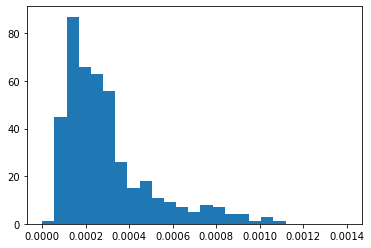

In [8]:
#all data
plt.hist(MSE_values_aggregate, bins = 25, range=[0, 0.0014])
plt.show()

In [28]:
#load predictions bram
with open("predictions_testset_givenweights_withcmax_557classes.pkl", "rb") as fp:   # Unpickling
    y_hat_lindel = pkl.load(fp)

In [29]:
len(y_hat_lindel.keys())

439

In [34]:
type(y_hat[0][0])

numpy.float64

In [31]:
for i in range(len(y_hat)):
    print(len(y_hat[i]))

557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557
557


In [32]:
MSE_values_aggregate_pred = []

for i in range(len(Lindel_test_np)):
    y_hat[i]
    MSE_values_aggregate_pred.append(mean_squared_error(Lindel_test_np[i], y_hat[i]))

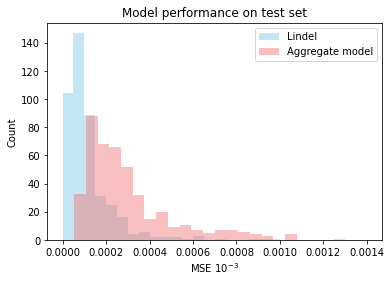

In [33]:
plt.hist(MSE_values_aggregate_pred, bins = 28, range=[0, 0.0014], color = "skyblue", alpha = 0.5, label="Lindel")
plt.hist(MSE_values_aggregate, bins = 26, range=[0, 0.0014], color = "lightcoral", alpha = 0.5, label="Aggregate model")
plt.xlabel("MSE $10^{-3}$")
plt.ylabel("Count")
plt.title("Model performance on test set")
plt.legend()
plt.show()

In [62]:
values_cdf = [sorted(MSE_values_aggregate)]

arr = []

for i in range(len(values_cdf[0])):
    arr.append((i+1) / len(values_cdf[0]))
    
values_cdf.append(arr)

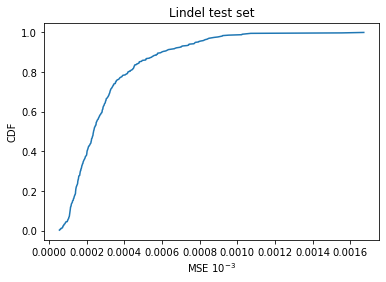

In [68]:
plt.plot(values_cdf[0], values_cdf[1])
plt.xlabel("MSE $10^{-3}$")
plt.ylabel("CDF")
plt.title("Lindel test set")
plt.show()